Link for the Project and DataSet:
https://www.kaggle.com/mlg-ulb/creditcardfraud

Context:
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content:
    
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed 
with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration:
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Acknowledgements:
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019.

In [8]:
#importing the libraries
import pandas as pd
data = pd.read_csv('creditcard.csv', sep=',')

In [9]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
174394,121896.0,-0.589567,1.048818,1.350518,-0.434655,0.606885,-0.861042,1.153447,-0.253539,-0.787434,...,-0.269752,-0.727712,-0.307847,0.081720,0.460084,0.397722,-0.025252,0.049133,0.89,0
153161,98061.0,1.573858,-0.960071,0.734857,1.974489,-1.365749,0.512757,-1.193265,0.195108,3.283764,...,0.118236,0.675213,0.038870,-0.088874,-0.300417,-0.571540,0.065786,0.001632,157.52,0
115069,73737.0,1.073871,-0.099451,-0.538206,0.695809,0.556809,0.407320,0.291639,-0.043882,-0.266617,...,0.050933,-0.097102,-0.446297,-1.363316,0.861411,-0.254537,-0.012758,0.016482,133.61,0
167420,118672.0,1.664704,-0.814313,-1.297502,0.173908,-0.107436,-0.186872,0.113119,-0.076574,0.740929,...,-0.003271,-0.190917,0.091952,0.737143,-0.145209,-0.158625,-0.060202,-0.028280,177.97,0
41757,40814.0,0.977425,-0.308720,0.396852,1.269260,-0.480353,0.034638,-0.092442,0.101274,0.447764,...,0.024262,0.024254,-0.258331,0.023123,0.696022,-0.293279,0.010866,0.024693,110.00,0


By executing this command one may observe that 5 random rows are shown.

In [10]:
#Lets get some information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

All the variables in the Dataset are non-null variables, with Float64 data types, except for Class which is an int64, consisting of '1' for 'Fraud' and '0' for non Fraud

Exploratory Data Analysis:

In [11]:
#Checking for null values in 
data.isnull().values.any()

False

Thus we observe that there are no null values in the dataset

In [12]:
#Get the Total Fraud and Total Normal Transactions
Fraud = data[data['Class']==1]
Normal = data[data['Class']==0]
print(Fraud.shape,Normal.shape)

(492, 31) (284315, 31)


We observe that there are 284315 Normal Transactions, and 492 Fraud Transactions, thus the dataset is highly unbalanced, we must find a way to use this highly unbalanced dataset and predict the Fraud transactions in the right way

In [13]:
#We need more information on these transactions to extract more data
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Let us try to understand if there was any relation between time and the Fraud transaction taking place

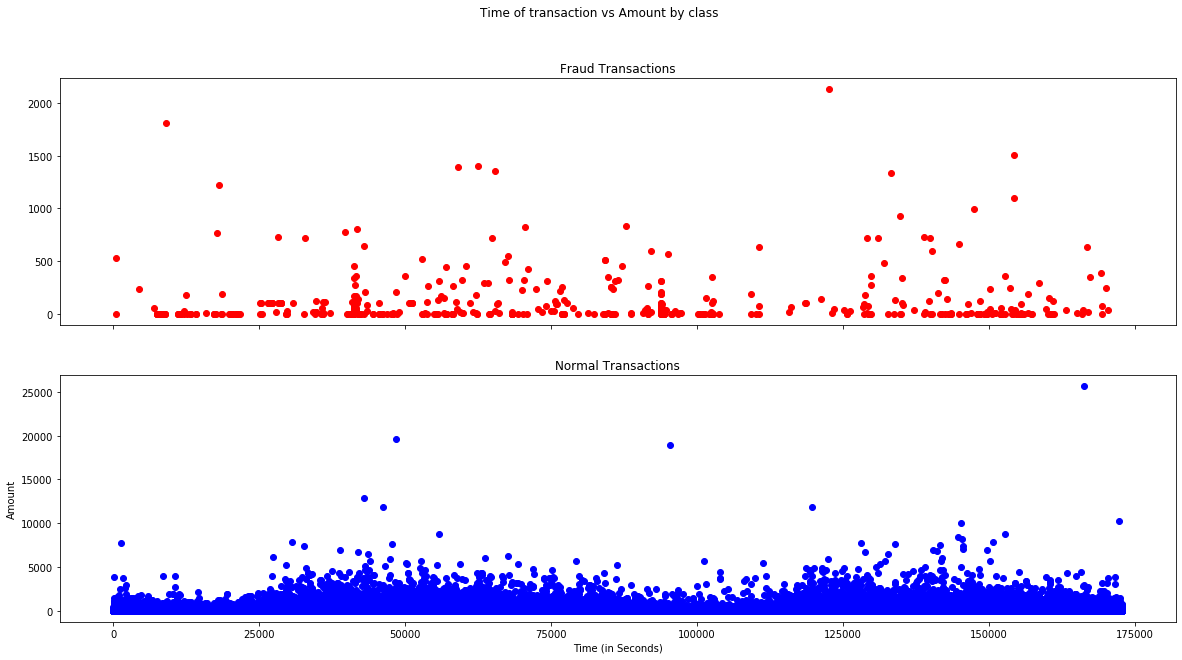

In [16]:
import matplotlib.pyplot as plt
Figure, (subfigure1, subfigure2) = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
Figure.suptitle('Time of transaction vs Amount by class')
subfigure1.scatter(Fraud.Time, Fraud.Amount, color='red')
subfigure1.set_title('Fraud Transactions')
subfigure2.scatter(Normal.Time, Normal.Amount, color='blue')
subfigure2.set_title('Normal Transactions')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

One may observe that from the data that the Fraudulent transactions have been occuring throughout the 48 hours for which we have the data. However most of the Fraudulent transactions are below 500. The positive side of this data visualisation is that given any random batch of data, we will have both fraudulent and normal transactions.

Let us find out what was the Total sum of Fraudulent transactions

Let us now compare the total number of Normal Transactions and Fraudulent Transactions

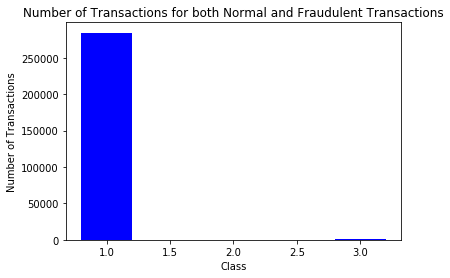

In [17]:
Class = [1, 3]
NumberofTransactions = [len(Normal), len(Fraud)]
plt.bar(Class, NumberofTransactions, width = 0.4, color='blue')
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.title('Number of Transactions for both Normal and Fraudulent Transactions')
plt.show()

One may observe that out of 2,84,807 transactions only 492 transactions were Fraudulent, let us now check in terms of amount what is the value of fraudulent transactions

In [18]:
sum(Fraud.Amount.values)

60127.96999999997

Thus we can observe that in a time of just 48 hours there was about 60,128 Euros worth Fraudulent transactions.

In [19]:
sum(Normal.Amount.values)

25102462.039983638

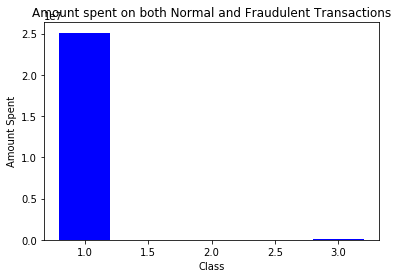

In [20]:
NumberofTransactions = [sum(Normal.Amount.values), sum(Fraud.Amount.values)]
plt.bar(Class, NumberofTransactions, width = 0.4, color='blue')
plt.ylabel('Amount Spent')
plt.xlabel('Class')
plt.title('Amount spent on both Normal and Fraudulent Transactions')
plt.show()

Thus it shows that 2,51,02,462.04 Euros was normal transaction in two days and 60,127.97 euros was Fraudulent.

Building the Correlation Matrix: A correlation matrix is a matrix that is used to find the correlation between various parameters of the dataset. It is an orthogonal matix ([A] = [A]^t), such that the diagonal is equal to one (Because it tells us about the relationship of the parameter with itself).

if the correlation value between any two parameters is positive then they have direct relationship between them (Increasing A, Increases B).

if the correlation value between any two parameters is negative then they have inverse relationship between them (Increasing A, Decreases B).

Given below is a Correlation Matrix that is constructed.

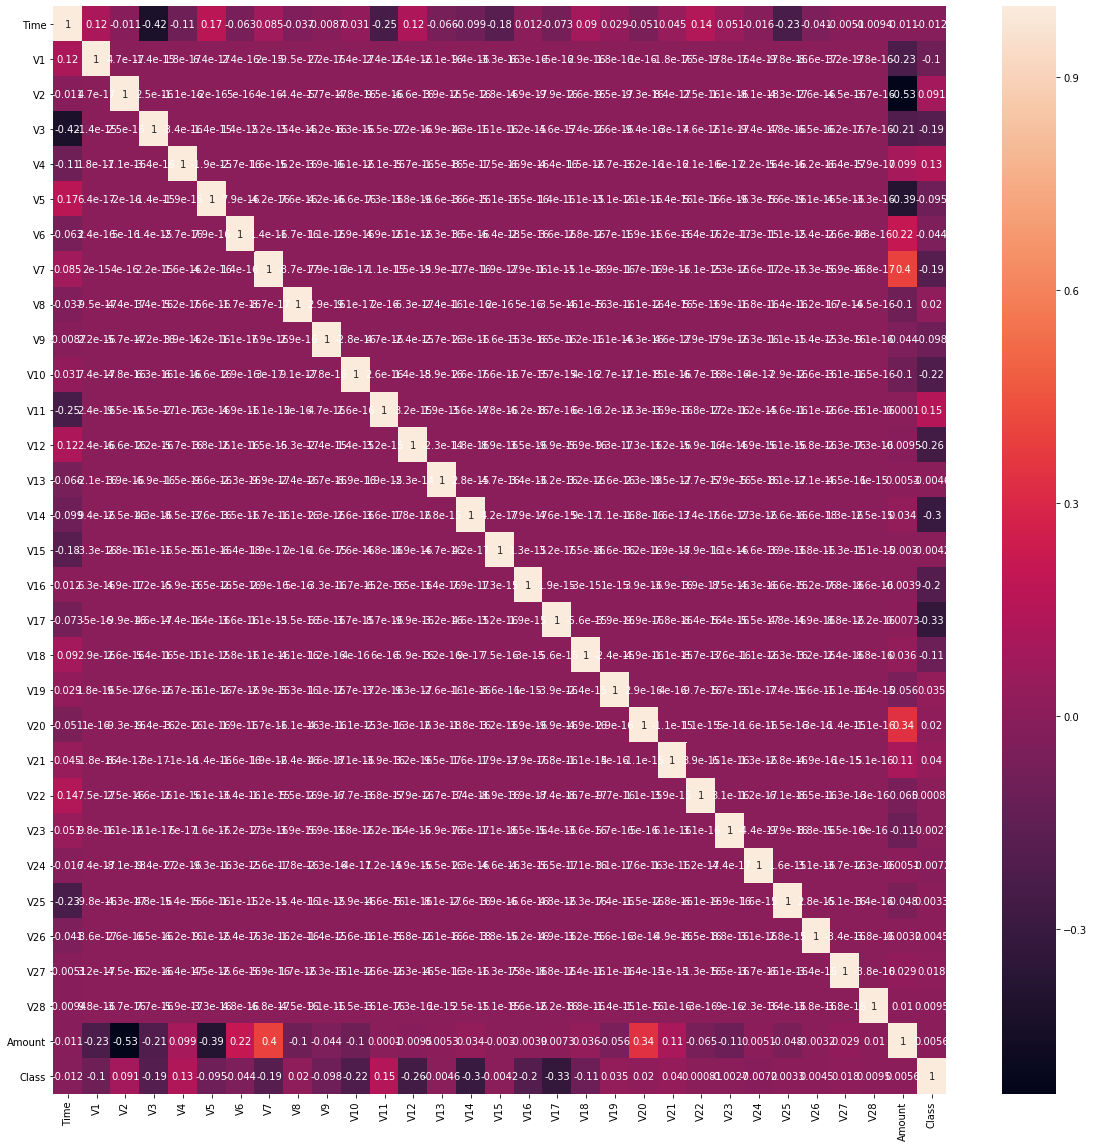

In [21]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
CorrMat = data.corr()
top_corr_features = CorrMat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [22]:
#Scaling the amount and Time
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

ScaledTime = scaler1.fit_transform(data[['Time']])
scaledtimeTEMP = []
for item in range(len(ScaledTime)):
    scaledtimeTEMP.append(ScaledTime[item][0])
ScaledTime = pd.Series(scaledtimeTEMP)

ScaledAmount = scaler2.fit_transform(data[['Amount']])
scaledamountTEMP = []
for item in range(len(ScaledAmount)):
    scaledamountTEMP.append(ScaledAmount[item][0])
ScaledAmount = pd.Series(scaledamountTEMP)

print('Scaled Time: {}\nScaled Amount: {}'.format(ScaledTime.sample(5), ScaledAmount.sample(5)))

Scaled Time: 105162   -0.535395
228489    1.068019
8488     -1.757154
26094    -1.282635
130595   -0.324837
dtype: float64
Scaled Amount: 117873   -0.317287
49620    -0.338956
154673   -0.310850
257997    1.763837
193986    0.546340
dtype: float64


In [23]:
#Concating the Scaled Time and Scaled Amount
data = pd.concat([data, ScaledTime.rename('Scaled_Time'), ScaledAmount.rename('Scaled_Amount')], axis=1)
#Deleting the Original Amount and Time Columns
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
101569,1.294496,0.504657,-0.791049,0.526970,0.487445,-0.621265,0.254065,-0.099441,-0.313903,-0.417651,...,-0.407654,-0.190000,-0.592513,0.640842,0.403612,-0.040962,0.017397,0,-0.567192,-0.350191
46262,1.056235,0.018979,0.768576,1.259202,-0.822730,-0.942614,-0.006912,-0.130771,0.239417,-0.045119,...,-0.216901,0.014494,0.673527,0.333049,-0.520410,0.019505,0.046008,0,-1.097262,-0.053373
254238,-1.985706,2.278771,-1.671238,-0.855081,0.931020,-0.574178,0.564321,1.092761,-1.502032,-1.449838,...,0.045121,-0.609438,0.063986,1.347821,0.826884,-0.478179,-0.113615,0,1.301888,-0.314288
76901,1.481266,-1.243993,0.671904,-1.494739,-1.764855,-0.330309,-1.474326,0.118939,-1.590493,1.644312,...,0.162558,-0.032280,-0.035987,0.300850,-0.095281,0.037512,0.010103,0,-0.800535,-0.311649
216459,-2.558135,2.489653,-1.428371,-1.065069,-0.480611,-1.468586,0.031658,1.166294,0.118326,-0.252329,...,-0.166301,0.120827,-0.118148,0.141042,-0.136633,-0.235857,-0.095004,0,0.961760,-0.353229


In [24]:
#Manual Splitting of Test and Train Data
import numpy as np
Splitter = np.random.rand(len(data)) < 0.9 #generates random number of uniform distribution between 0 and 1, for all numbers greater than 0.9, it gives an output of 'False'
Trainset = data[Splitter]
Testset = data[~Splitter]
print('Training Data Shape: {}\nTest Data Shape: {}'.format(Trainset.shape, Testset.shape))
Trainset.reset_index(drop=True, inplace=True)
Testset.reset_index(drop=True, inplace=True)

Training Data Shape: (256282, 31)
Test Data Shape: (28525, 31)


We shall convert this highly imbalanced dataset to a balanced data set

In [25]:
NumberOfFrauds = Trainset.Class.value_counts()[1]
print('Number of Frauds in Training Set: {}'.format(NumberOfFrauds))

Number of Frauds in Training Set: 452


In [26]:
FraudulentTransactions = Trainset[Trainset['Class']==1]
NonFraudulentTransactions = Trainset[Trainset['Class']==0]
print('Fraudulent Transactions: {}\nNonFraudulent Transactions: {}'.format(len(FraudulentTransactions), len(NonFraudulentTransactions)))

Fraudulent Transactions: 452
NonFraudulent Transactions: 255830


In [28]:
#Creating a Data of Non Fraudulent transactions 
SampleNonFraudulentTransaction = NonFraudulentTransactions.sample(NumberOfFrauds)
SampleNonFraudulentTransaction.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
221919,-0.941298,1.532859,-1.316999,-0.858801,0.785682,-0.539518,0.898142,0.618797,-0.937790,-0.963993,...,0.752410,-0.321449,0.384299,0.322145,-0.171516,-0.271728,0.011620,0,1.229996,-0.239764
166265,-1.521469,-1.173872,0.179702,-0.098374,1.080593,-1.259049,1.224947,-0.189917,-0.202467,-1.059949,...,0.422285,0.289978,-0.140732,1.206681,-0.009186,-0.427426,-0.297637,0,0.664717,0.785545
132491,-1.679065,0.798690,1.180250,2.473777,1.897500,-0.465193,1.302706,-0.089220,-2.324308,0.690818,...,0.777895,-0.709505,0.110219,1.249341,0.302135,-0.113953,0.035897,0,-0.138537,-0.049095
61728,-2.166252,1.089031,-1.263315,-0.450902,-3.447476,1.670505,1.986326,1.016842,-0.118475,-1.425282,...,0.776698,-0.018839,-0.208530,0.270802,-0.262731,0.425233,-0.197469,0,-0.878723,2.042904
56633,-1.116445,-0.232077,0.861265,0.064398,0.235883,-0.636014,1.112156,-0.064485,-1.066680,-0.292054,...,-0.067324,0.174181,0.043622,0.407897,1.252378,-0.147931,0.056770,0,-0.933032,0.452665


In [29]:
FraudulentTransactions.reset_index(drop=True, inplace=True)
SampleNonFraudulentTransaction.reset_index(drop=True, inplace=True)
BalancedData = pd.concat([FraudulentTransactions, SampleNonFraudulentTransaction])
print(len(BalancedData))

904


In [30]:
#shuffling the data
BalancedData = BalancedData.sample(frac=1).reset_index(drop=True)
BalancedData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_Time,Scaled_Amount
0,-1.017884,0.302244,2.800196,2.133906,-0.455611,0.886341,0.274127,0.008095,0.559290,-0.103576,...,-0.414870,-0.087026,0.426754,0.072571,-0.295578,-0.249518,-0.031190,0,-1.255386,-0.053093
1,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,-3.851722,...,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,1,0.727702,-0.353229
2,0.929194,-0.811926,1.133501,0.098055,-1.525284,-0.524673,-0.669774,0.012465,0.906273,-0.316309,...,0.529276,-0.140218,0.484016,0.006832,1.128562,-0.059708,0.048376,0,-0.729128,0.293981
3,1.313286,-0.052208,-1.346128,-0.532695,2.141751,3.191469,-0.413771,0.743622,-0.117392,0.032160,...,-0.275604,-0.106392,1.042905,0.684974,0.411908,-0.040684,0.003959,0,-0.622575,-0.306252
4,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,-4.001742,...,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,1,-0.746058,-0.277346


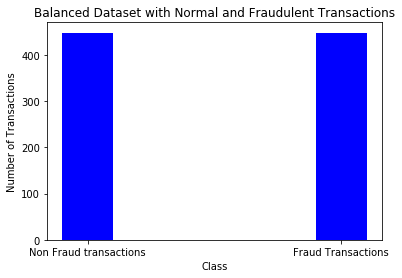

In [65]:
#Making a bar plot to show the Balance between Fradulent and Non Fraudulent Transactions
Transactions = [len(BalancedData[BalancedData['Class']==0]), len(BalancedData[BalancedData['Class']==1])]
plt.bar(Class, Transactions, width = 0.4, color='blue')
plt.ylabel('Number of Transactions')
plt.xlabel('Class')
plt.xticks(Class, ('Non Fraud transactions', 'Fraud Transactions'))
plt.title('Balanced Dataset with Normal and Fraudulent Transactions')
plt.show()

The Bar chart above shows that both Fraudulent and Non Fraudulent Transactions are Balanced

In [31]:
#Lets now analyse the Correlation Matrix
Correlation = BalancedData.corr()
Correlation.loc[:, 'Class']

V1              -0.420843
V2               0.478180
V3              -0.562771
V4               0.714055
V5              -0.367927
V6              -0.378946
V7              -0.456135
V8               0.054131
V9              -0.549065
V10             -0.626518
V11              0.687072
V12             -0.685747
V13             -0.037951
V14             -0.751544
V15             -0.047957
V16             -0.591984
V17             -0.553287
V18             -0.453154
V19              0.254616
V20              0.182151
V21              0.118745
V22             -0.003575
V23             -0.001416
V24             -0.103045
V25              0.004161
V26              0.064848
V27              0.092925
V28              0.084884
Class            1.000000
Scaled_Time     -0.125357
Scaled_Amount    0.100239
Name: Class, dtype: float64

The result above shows the Correlation Matrix with respect to the Class 

In [32]:
Correlation[Correlation.loc[:, 'Class'] > 0.5].loc[:, 'Class']

V4       0.714055
V11      0.687072
Class    1.000000
Name: Class, dtype: float64

One may observe that V4 and V11 has high positive correlation with respect to the Class.

In [33]:
Correlation[Correlation.loc[:, 'Class'] < -0.5].loc[:, 'Class']

V3    -0.562771
V9    -0.549065
V10   -0.626518
V12   -0.685747
V14   -0.751544
V16   -0.591984
V17   -0.553287
Name: Class, dtype: float64

One may observe that V3, V9, V10, V12, V14, V16 and V17 has high negative correlation with respect to the Class.

In [35]:
X = BalancedData.drop('Class', axis=1)
Y = BalancedData.Class

**Splitting The Dataset**

In [36]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=1/5, random_state=42)
print('Lengths of Xtrain: {}\n Xtest: {}\n Ytrain: {}\n Ytest: {}'.format(len(Xtrain), len(Xtest), len(Ytrain), len(Ytest)))

Lengths of Xtrain: 723
 Xtest: 181
 Ytrain: 723
 Ytest: 181


**Building the Model**
In this section we will use different Classifiers and try to estimate their accuracy.
The Different Classifiers used are as follows:
**1 - Logistic Regression Classification**
For details of this Technique, refer the link: https://towardsdatascience.com/logistic-regression-for-dummies-a-detailed-explanation-9597f76edf46
**2 - K Nearest Neighbours Classification**
For details of this Technique, refer the link: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
**3 - Support Vector Machine (SVM) Classifier**
For details of this Technique, refer the link: https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
**4 - Kernel Support Vector Machine (k-SVM) Classifier**
**5 - Naive Bayes Classifier**
For details of this Technique, refer the link: https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c
**6 - Random Forest Classifier**
For details of this Technique, refer the link: https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1







In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


#Creating a Logistic Regression Classifier Model
ClassifierLR = LogisticRegression(random_state = 42)
ClassifierLR.fit(Xtrain, Ytrain)
#Predicting Results using Logistic Regression Algorithm
YpredLR = ClassifierLR.predict(Xtest)
cmLR = confusion_matrix(Ytest, YpredLR)

#Creating a K Nearest Neighbours Classifier Model
ClassifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
ClassifierKNN.fit(Xtrain, Ytrain)
#Predicting Results using K Nearest Neighbours Algorithm
YpredKNN = ClassifierKNN.predict(Xtest)
cmKNN = confusion_matrix(Ytest, YpredKNN)

#Creating a Support Vector Machine Classifier Model
ClassifierSVC = SVC(kernel='linear', gamma='scale', random_state=42)
ClassifierSVC.fit(Xtrain, Ytrain)
#Predicting Results using SVM Algorithm
YpredSVM = ClassifierSVC.predict(Xtest)
cmSVM = confusion_matrix(Ytest, YpredSVM)

#Creating a Kernel Support Vector Machine Classifier Model
ClassifierKSVC = SVC(kernel='rbf', gamma='scale', random_state=42)
ClassifierKSVC.fit(Xtrain, Ytrain)
#Predicting Results using kernel SVM Algorithm
YpredKSVM = ClassifierKSVC.predict(Xtest)
cmKSVM = confusion_matrix(Ytest, YpredKSVM)

#Creating a Naive Bayes Classifier Model
ClassifierNB = GaussianNB()
ClassifierNB.fit(Xtrain, Ytrain)
#Predicting Results using Naive Bayes Algorithm
YpredNB = ClassifierNB.predict(Xtest)
cmNB = confusion_matrix(Ytest, YpredNB)

#Creating a Decision Tree Classifier Model
ClassifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
ClassifierDT.fit(Xtrain, Ytrain)
#Predicting Results using Decision Tree Classifier Algorithm
YpredDT = ClassifierDT.predict(Xtest)
cmDT = confusion_matrix(Ytest, YpredDT)

#Creating A Random Forest Classifier Model
ClassifierRFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
ClassifierRFC.fit(Xtrain, Ytrain)
#Predicting Results using Random Forest Classifier Algorithm
YpredRFC = ClassifierRFC.predict(Xtest)
cmRFC = confusion_matrix(Ytest, YpredRFC)

C:\Users\shabarish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix = {[TP, FP], [FN, TN]}

where;
TP = True Positive. Fraudulent transactions the model predicts as fraudulent.
TN = True Negative. Normal transactions the model predicts as normal.
FP = False Positive. Normal transactions the model predicts as fraudulent.
FN = False Negative. Fraudulent transactions the model predicts as normal.

We have 4 different parameters to evaluate the efficiency of our models:
The 4 ways are as described below:
**1 - Accuracy**
The formula for accuracy is as shown below:

Accuracy = (TP + TN) / (TP + TN + FP + FN) 

Accuracy is one of the metrics to evaluate classification models. It is the ratio of total correct predictions to the total number of predictions. It tells us of the percentage of correct results over the total results. 
**2 - Recall**
The Formula is as shown below:

Recall = (TP) / (TP + FN) 

Out of all the correct predictions by model, what was the actual fraud predictions given by model.

**3 - Precision**
The Formula is as shown below:

Precision = (TP) / (TP + FP) 

Out of all the Fraudulent predictions by model what percentage was correct. 

**4 - F1 Score**
The Formula is as shown below:

F1 Score = 2 * (Recall * Prediction) / (Recall + Prediction)

The F1 score combines Recall and Precision into one metric as a weighted average of the two. Unlike Recall and Precision individually, F1 takes both false positives and false negatives into consideration. In imbalanced classes such as this, F1 is much more effective than accuracy at determining the performance of the model.



In [39]:
def AccuracyPredictors(ConfusionMatrix):
    Accuracy = (ConfusionMatrix[0][0] + ConfusionMatrix[1][1]) /(ConfusionMatrix[0][0] + ConfusionMatrix[0][1] + ConfusionMatrix[1][0] + ConfusionMatrix[1][1])
    Recall = (ConfusionMatrix[0][0]) / (ConfusionMatrix[0][0] + ConfusionMatrix[1][0])
    Precision = (ConfusionMatrix[0][0]) / (ConfusionMatrix[0][0] + ConfusionMatrix[0][1])
    F1Score = 2 * ((Recall * Precision) / (Recall + Precision))
    return [Accuracy, Recall, Precision, F1Score]

Accuracy_Logistic_Regression = AccuracyPredictors(cmLR) #Accuracy from a Logistic Regression Classifier
Accuracy_KNN = AccuracyPredictors(cmKNN) #Accuracy from K Nearest Neighbour Classifier
Accuracy_SVM = AccuracyPredictors(cmSVM) #Accuracy from Support Vector Machine Classifier
Accuracy_KSVM = AccuracyPredictors(cmKSVM) #Accuracy from Kernel Support Vector Machine Classifier
Accuracy_NB = AccuracyPredictors(cmNB) #Accuracy from Naive Bayes Classifier
Accuracy_DT = AccuracyPredictors(cmDT) #Accuracy from Decision Tree Classifier
Accuracy_RFC = AccuracyPredictors(cmRFC) #Accuracy from Random Forest Classifier
    

In [42]:
Results = pd.DataFrame(index = ['Logistic Regression', 'K Nearest Neighbours', 'Support Vector Machine', 'Kernel Support Vector Machine', 'Naive Bayes', 'Decision Trees', 'Random Forest Classifier'], columns = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
Results.iloc[0, :] = Accuracy_Logistic_Regression
Results.iloc[1, :] = Accuracy_KNN
Results.iloc[2, :] = Accuracy_SVM
Results.iloc[3, :] = Accuracy_KSVM
Results.iloc[4, :] = Accuracy_NB
Results.iloc[5, :] = Accuracy_DT
Results.iloc[6, :] = Accuracy_RFC
print(Results)

                               Accuracy    Recall Precision  F1 Score
Logistic Regression            0.944751  0.931818  0.953488  0.942529
K Nearest Neighbours           0.933702  0.902174  0.965116  0.932584
Support Vector Machine         0.950276  0.932584  0.965116  0.948571
Kernel Support Vector Machine  0.922652  0.882979  0.965116  0.922222
Naive Bayes                    0.917127  0.858586  0.988372  0.918919
Decision Trees                 0.933702   0.95122  0.906977  0.928571
Random Forest Classifier       0.928177  0.901099  0.953488  0.926554


From the Results shown above one may understand that:
1 - Both support vector Machine and Logistic Regression score highest in Accuracy and F1 Score.
2 - Decision Trees Classifier scores highest in Recall, thus it has the highest correct predictions out of all the correct predictions by model, it scores the highest correct fraud predictions.
3 - Naive bayes eventhough has highest precision, has a very less recall value, thus we can perform parameter tuning to improve the recall value of this model.
4 - KNN, SVM and KSVM score equal when it comes to predictions.

Thus the best model to be chosen based the F1 Score that takes into account both Recall and Precision would be the SVM classifier, thus parameter tuning can be carried out to further increase the accuracy of this model.


**Conclusion and Future work** 
In this project we have compared 7 different classifier models, to evaluate the accuracy parameters for each and compare them to determine the best model.

In the problem statement we have modified the dataset to make it a balanced dataset, thus to carry out our operations, however we would like to perform 'Anamoly detection Techniques' like Isolation Forest Algorithm and Local Outlier Factor algorithm on the complete dataset to identify frauds as an outlier.

We can also use Deep learning methods such as Self Organizing Maps to check for the accuracy on the complete dataset